# Pendulum

Using Lagrangian Mechanincs, we can derive the equation of motion for a simple pendulum.
The system consists:
- Mass $m$ at the end of massless rod
- Rod of length $l$
- Pivot point at $(0,0)$
- Gravity $g$

The generalised coordinates are the angle $\theta$ and the angular velocity $\dot{\theta}$.

The Lagrangian is given by:

$$
\mathcal{L} = T - V
$$

where $T$ is the kinetic energy and $V$ is the potential energy.

In the case of the simple pendulum:
$$
T = \frac{1}{2} m l^2 \dot{\theta}^2
$$
$$
V = - m g l \cos(\theta)
$$

The Euler-Lagrange equation is:
$$
\frac{d}{dt} \left( \frac{\partial \mathcal{L}}{\partial \dot{\theta}} \right) - \frac{\partial \mathcal{L}}{\partial \theta} = 0
$$

This is easy to solve.
I will be using sympy to practice symbolic computation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [24]:
# Define the symbolic variables
t = sp.symbols('t')
l, m = sp.symbols('l m', positive=True)
g = sp.symbols('g', real=True)

# Define the symbolic functions
theta = sp.Function('theta')(t)
theta_dot = sp.diff(theta, t)

# Position and velocity of the pendulum
r = np.array([l*sp.sin(theta), -l*sp.cos(theta)])
v = np.array([sp.diff(r[0], t), sp.diff(r[1], t)])

# Kinetic and potential energy
T = 0.5 * m * np.dot(v, v)
V = m*g*r[1]

# Lagrangian
L = T - V

In [25]:
# Euler-Lagrange terms
dL_dth = sp.diff(L, theta)
dL_dth_dt = sp.diff(L, theta_dot).diff(t)

# Euler-Lagrange equation dL/dq - d/dt(dL/dq_dot) = 0
lag_eq = dL_dth - dL_dth_dt
lag_eq

-g*l*m*sin(theta(t)) - 0.5*m*(2*l**2*sin(theta(t))**2*Derivative(theta(t), (t, 2)) + 2*l**2*cos(theta(t))**2*Derivative(theta(t), (t, 2)))

In [26]:
equation = lag_eq.simplify()
equation

-1.0*l*m*(g*sin(theta(t)) + l*Derivative(theta(t), (t, 2)))

In [27]:
equation_solved = sp.solve(equation, theta_dot.diff(t))[0]
equation_solved

-g*sin(theta(t))/l

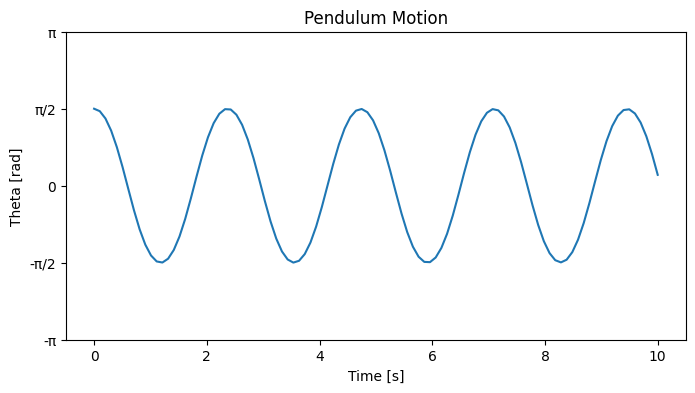

In [34]:
from scipy.integrate import solve_ivp

# Convert the symbolic solution to a numerical function
theta_ddot_func = sp.lambdify((theta, theta_dot, l, g), equation_solved)

# Define the ODE system
def pendulum_ode(t, y, l, g):
	theta, theta_dot = y
	theta_ddot = theta_ddot_func(theta, theta_dot, l, g)
	return [theta_dot, theta_ddot]

# Example usage with initial conditions
l_value = 1.0  # length of the pendulum
g_value = 9.81  # acceleration due to gravity
y0 = [np.pi / 2, 0]  # initial conditions: [theta(0), theta_dot(0)]
t_span = (0, 10)  # time span for the solution

# Solve the ODE
solution = solve_ivp(pendulum_ode, t_span, y0, args=(l_value, g_value), dense_output=True)

# Plot the solution
t_vals = np.linspace(*t_span, 100)
theta_vals = solution.sol(t_vals)[0]

plt.figure(figsize=(8, 4))
plt.plot(t_vals, theta_vals)
plt.xlabel('Time [s]')
plt.ylabel('Theta [rad]')
plt.yticks([-np.pi, -0.5*np.pi, 0, 0.5*np.pi, np.pi], ['-π', '-π/2', '0', 'π/2', 'π'])
plt.title('Pendulum Motion')
plt.show()
